# Dataset Visualization and Analysis for Image Classification

In [16]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

from PIL import Image, UnidentifiedImageError

In [4]:
def count_images_in_classes(dataset_path):
    class_counts = defaultdict(int)
    
    # Iterate through each class folder
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)
        
        # Ensure it's a directory
        if os.path.isdir(class_folder):
            # Count the number of images in the class folder
            num_images = len([file for file in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, file))])
            class_counts[class_name] = num_images
    
    return class_counts

def plot_class_counts(dataset_path):
    class_counts = count_images_in_classes(dataset_path)

    # Plotting the class counts
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Class')
    plt.xticks(rotation=45)
    plt.show()

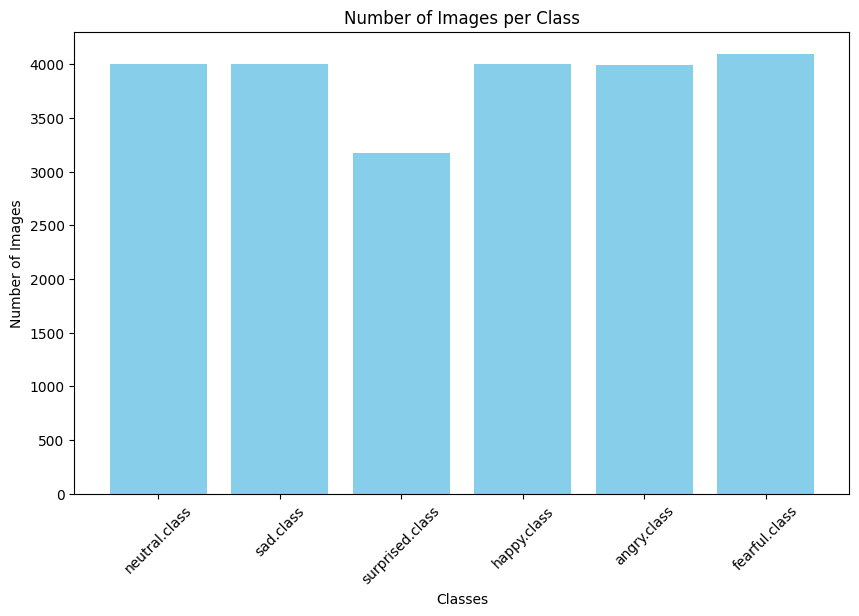

In [10]:
dataset_path_train = '/Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train'
plot_class_counts(dataset_path_train)

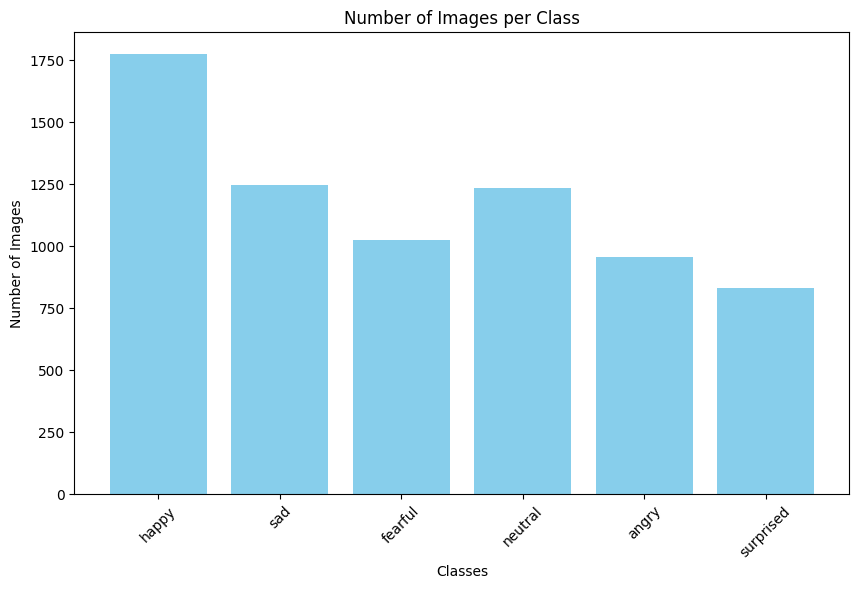

In [11]:
dataset_path_test = '/Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/test'
plot_class_counts(dataset_path_test)

## Function to Visualize Distribution of Image Sizes

In [17]:
def plot_image_size_distribution(dataset_path):
    widths = []
    heights = []

    # Iterate through each class folder
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)

        # Ensure it's a directory
        if os.path.isdir(class_folder):
            # Iterate through each image file
            for image_file in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_file)
                if os.path.isfile(image_path):
                    try:
                        with Image.open(image_path) as img:
                            widths.append(img.width)
                            heights.append(img.height)
                    except UnidentifiedImageError:
                        print(f"Skipping file: {image_path}")

    # Plot the distributions
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    axs[0].hist(widths, bins=30, color='skyblue', edgecolor='black')
    axs[0].set_title('Distribution of Image Widths')
    axs[0].set_xlabel('Width (pixels)')
    axs[0].set_ylabel('Frequency')
    
    axs[1].hist(heights, bins=30, color='lightgreen', edgecolor='black')
    axs[1].set_title('Distribution of Image Heights')
    axs[1].set_xlabel('Height (pixels)')
    axs[1].set_ylabel('Frequency')
    
    plt.show()

Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/neutral.class/.DS_Store
Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/sad.class/.DS_Store
Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/surprised.class/.DS_Store
Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/happy.class/.DS_Store
Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/angry.class/.DS_Store
Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/fearful.class/.DS_Store


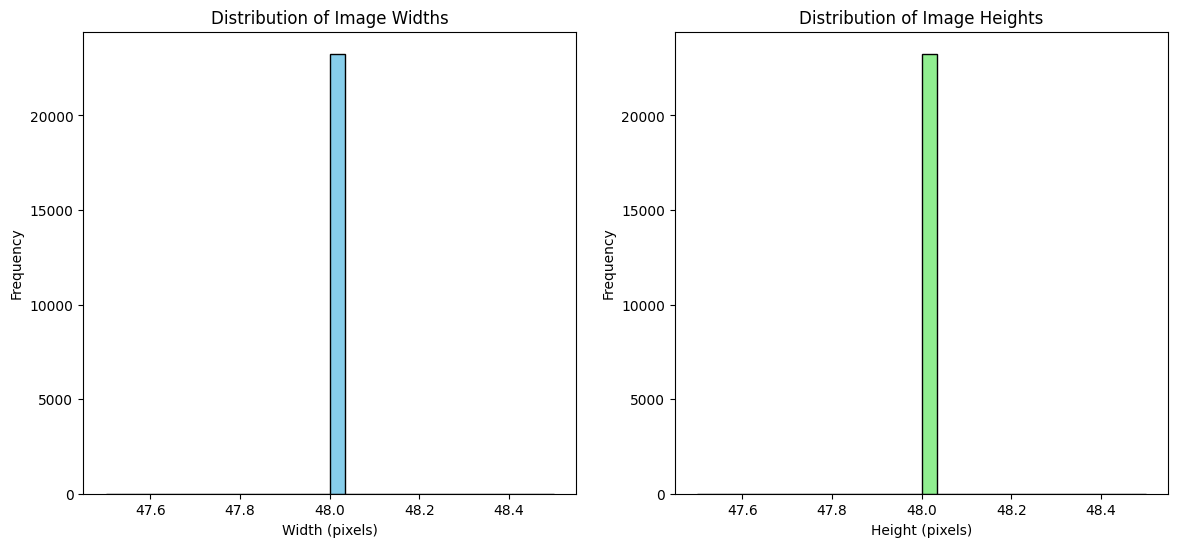

In [18]:
plot_image_size_distribution(dataset_path_train)

## Function to Visualize Aspect Ratios of Images

In [19]:
def plot_aspect_ratio_distribution(dataset_path):
    aspect_ratios = []

    # Iterate through each class folder
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)

        # Ensure it's a directory
        if os.path.isdir(class_folder):
            # Iterate through each image file
            for image_file in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_file)
                if os.path.isfile(image_path):
                    try:
                        with Image.open(image_path) as img:
                            aspect_ratios.append(img.width / img.height)
                    except UnidentifiedImageError:
                        print(f"Skipping file: {image_path}")

    # Plot the distribution of aspect ratios
    plt.figure(figsize=(10, 6))
    plt.hist(aspect_ratios, bins=30, color='coral', edgecolor='black')
    plt.title('Distribution of Image Aspect Ratios')
    plt.xlabel('Aspect Ratio (width/height)')
    plt.ylabel('Frequency')
    plt.show()

Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/neutral.class/.DS_Store
Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/sad.class/.DS_Store
Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/surprised.class/.DS_Store
Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/happy.class/.DS_Store
Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/angry.class/.DS_Store
Skipping file: /Users/enricozanetti/Desktop/IoT/IoT-Project/dataset/train/fearful.class/.DS_Store


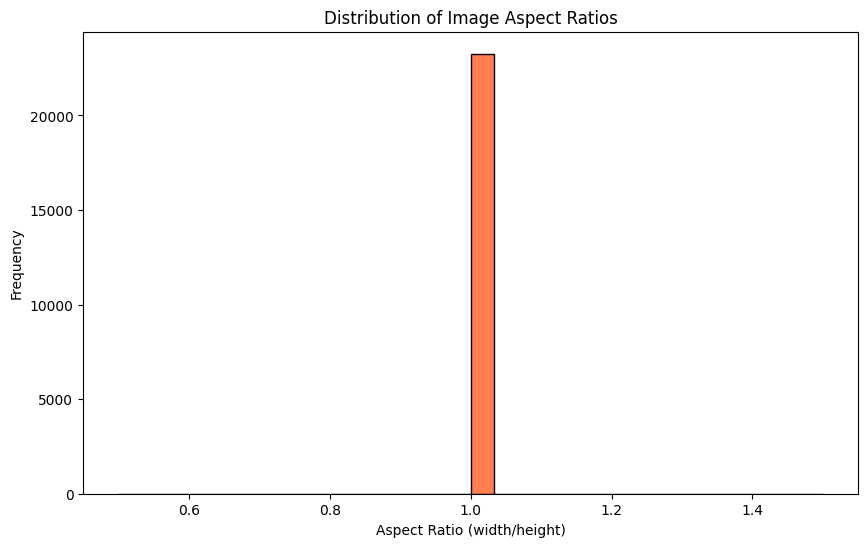

In [20]:
plot_aspect_ratio_distribution(dataset_path_train)

## Function to Display a Grid of Sample Images from Each Class

In [21]:
def plot_sample_images(dataset_path, samples_per_class=4):
    fig, axs = plt.subplots(len(os.listdir(dataset_path)), samples_per_class, figsize=(samples_per_class * 3, len(os.listdir(dataset_path)) * 3))
    
    for i, class_name in enumerate(os.listdir(dataset_path)):
        class_folder = os.path.join(dataset_path, class_name)

        # Ensure it's a directory
        if os.path.isdir(class_folder):
            images = [img for img in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, img))]
            for j in range(samples_per_class):
                if j < len(images):
                    image_path = os.path.join(class_folder, images[j])
                    try:
                        img = Image.open(image_path)
                        axs[i, j].imshow(img)
                        axs[i, j].axis('off')
                    except UnidentifiedImageError:
                        print(f"Skipping file: {image_path}")
                if j == 0:
                    axs[i, j].set_title(class_name, fontsize=16)
                else:
                    axs[i, j].set_title('')
    
    plt.tight_layout()
    plt.show()

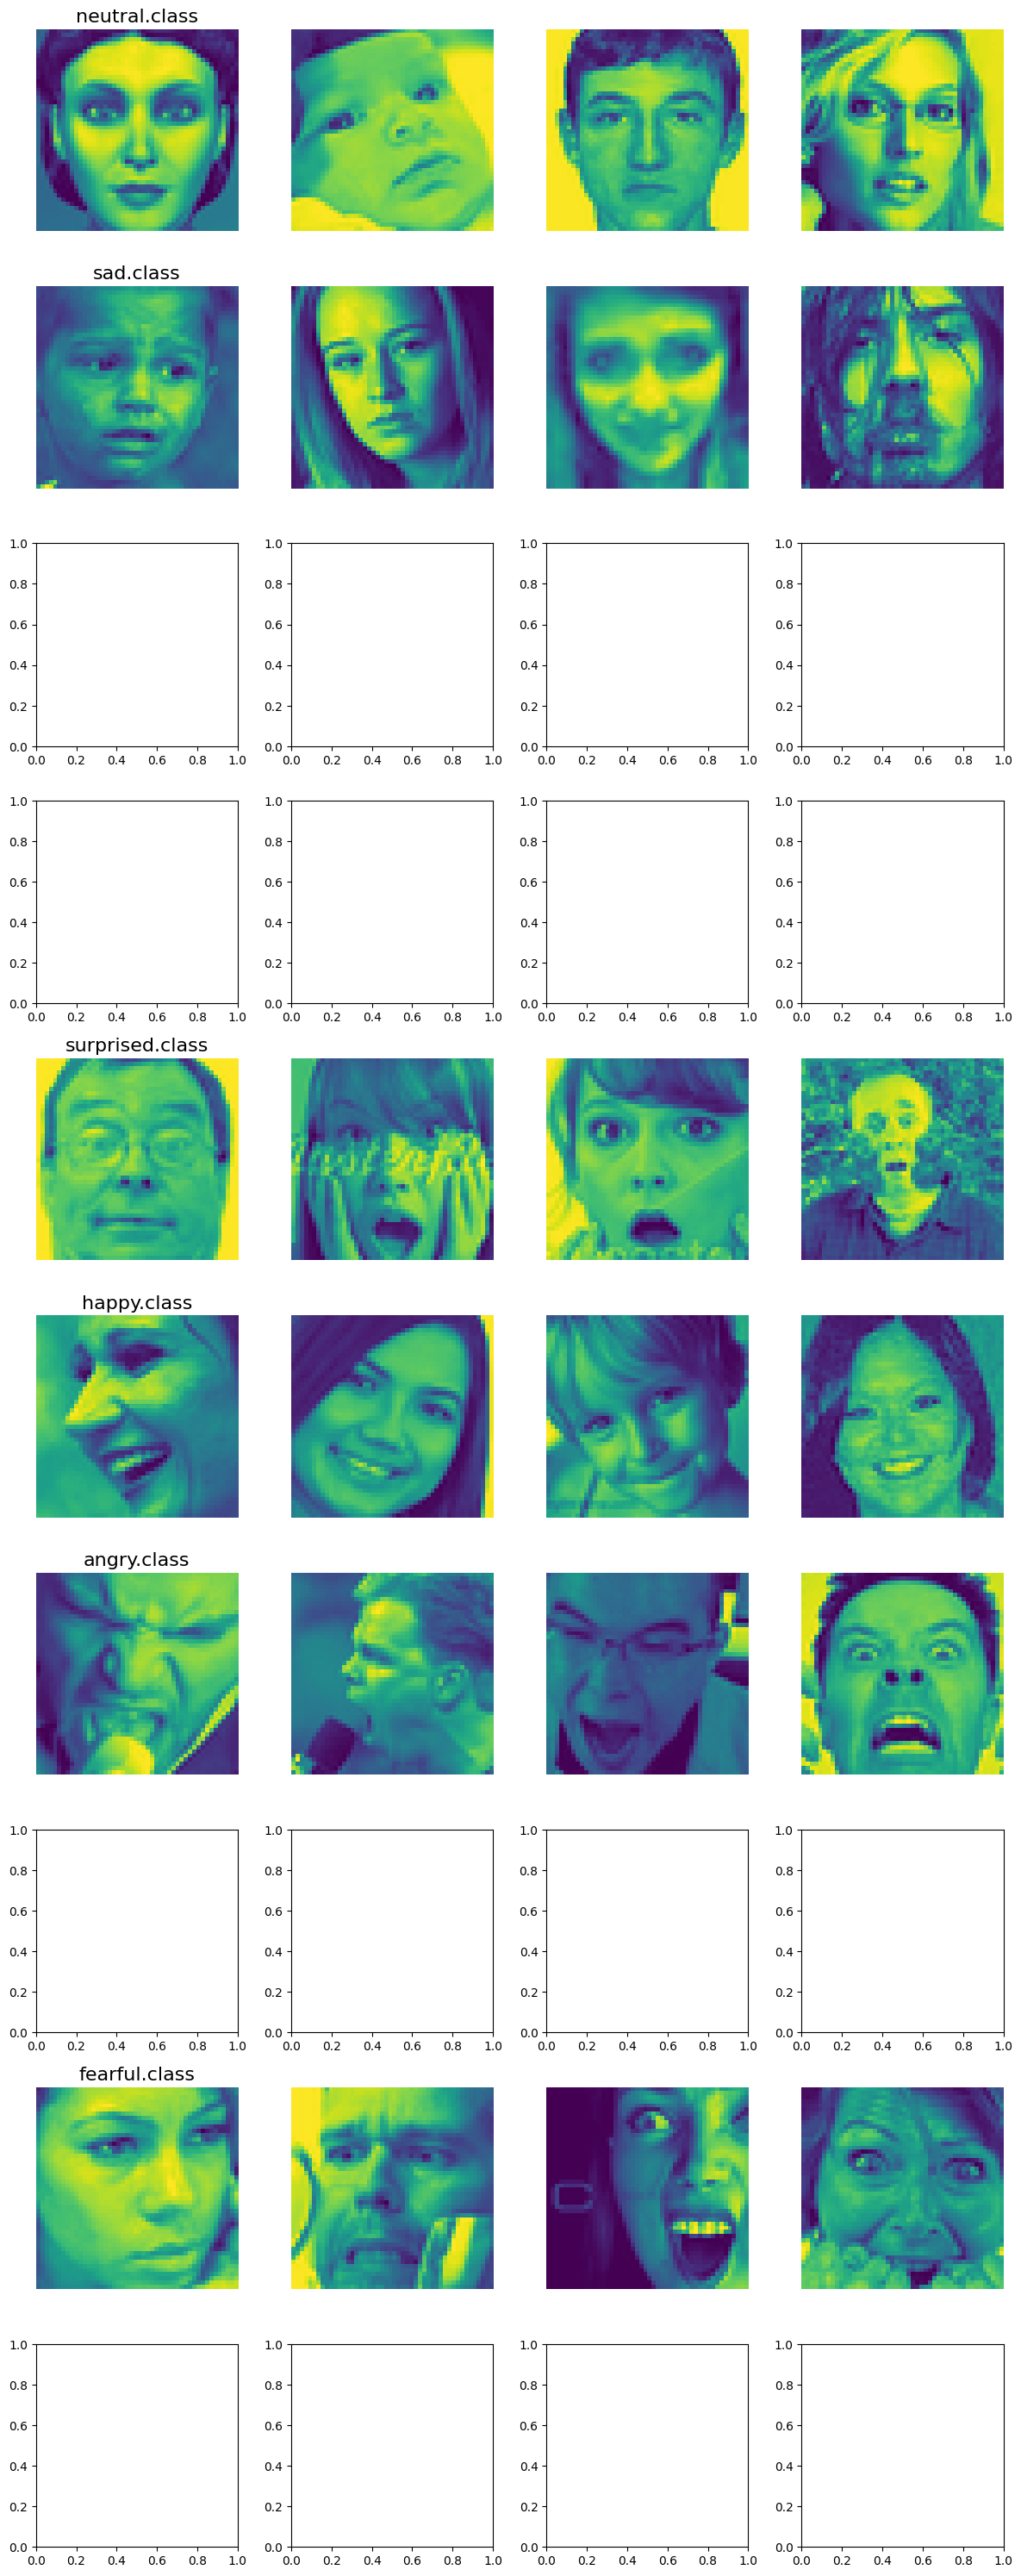

In [22]:
plot_sample_images(dataset_path_train)
